In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing.feature_names)

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.3, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Simple sequential model

In [2]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(loss='mse',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

## Initially let's run for 20 epochs
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
362/362 [==============================] - 0s 1ms/step - loss: 1.8661 - mae: 1.0020 - val_loss: 0.9046 - val_mae: 0.6611
Epoch 2/20
362/362 [==============================] - 0s 810us/step - loss: 0.6855 - mae: 0.6121 - val_loss: 0.6374 - val_mae: 0.5799
Epoch 3/20
362/362 [==============================] - 0s 801us/step - loss: 0.6052 - mae: 0.5677 - val_loss: 0.5937 - val_mae: 0.5547
Epoch 4/20
362/362 [==============================] - 0s 802us/step - loss: 0.5698 - mae: 0.5472 - val_loss: 0.5613 - val_mae: 0.5361
Epoch 5/20
362/362 [==============================] - 0s 802us/step - loss: 0.5435 - mae: 0.5322 - val_loss: 0.5381 - val_mae: 0.5248
Epoch 6/20
362/362 [==============================] - 0s 813us/step - loss: 0.5233 - mae: 0.5207 - val_loss: 0.5174 - val_mae: 0.5149
Epoch 7/20
362/362 [==============================] - 0s 800us/step - loss: 0.5049 - mae: 0.5114 - val_loss: 0.5004 - val_mae: 0.5014
Epoch 8/20
362/362 [==============================] - 0s 805us/s

In [4]:
mae_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 655us/step - loss: 0.4530 - mae: 0.4783


In [5]:
model_history.history

{'loss': [1.866111397743225,
  0.6854609847068787,
  0.6052201390266418,
  0.5698449611663818,
  0.543459415435791,
  0.5232684016227722,
  0.5049009323120117,
  0.4919716715812683,
  0.48117324709892273,
  0.4717719554901123,
  0.46467962861061096,
  0.45865628123283386,
  0.45319879055023193,
  0.4486929476261139,
  0.4448561668395996,
  0.44136446714401245,
  0.4378257095813751,
  0.4347650110721588,
  0.4319089353084564,
  0.4298749566078186],
 'mae': [1.001952052116394,
  0.6120920777320862,
  0.567655622959137,
  0.5472175478935242,
  0.5322085022926331,
  0.5206999182701111,
  0.5114387273788452,
  0.5026243329048157,
  0.49677911400794983,
  0.49149876832962036,
  0.487470418214798,
  0.4850500524044037,
  0.4819026291370392,
  0.47943925857543945,
  0.4767925441265106,
  0.47498512268066406,
  0.473204642534256,
  0.47162678837776184,
  0.46974214911460876,
  0.4688361883163452],
 'val_loss': [0.9046018123626709,
  0.63741135597229,
  0.593738317489624,
  0.561342179775238,
  

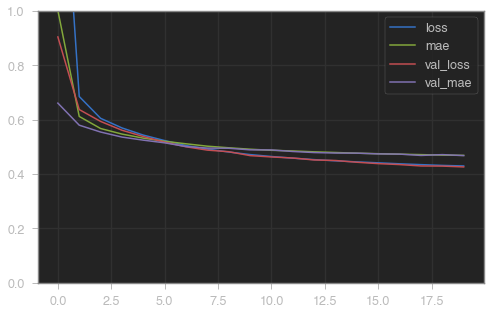

In [6]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()
## So we can see that there's still scope to tune the model and achieve better loss values

In [7]:
# Let's now run for 60 more epochs
model_history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
362/362 [==============================] - 0s 813us/step - loss: 0.4270 - mae: 0.4673 - val_loss: 0.4244 - val_mae: 0.4648
Epoch 2/60
362/362 [==============================] - 0s 798us/step - loss: 0.4246 - mae: 0.4658 - val_loss: 0.4227 - val_mae: 0.4628
Epoch 3/60
362/362 [==============================] - 0s 834us/step - loss: 0.4224 - mae: 0.4644 - val_loss: 0.4207 - val_mae: 0.4619
Epoch 4/60
362/362 [==============================] - 0s 1ms/step - loss: 0.4199 - mae: 0.4625 - val_loss: 0.4157 - val_mae: 0.4599
Epoch 5/60
362/362 [==============================] - 0s 1ms/step - loss: 0.4180 - mae: 0.4615 - val_loss: 0.4152 - val_mae: 0.4607
Epoch 6/60
362/362 [==============================] - 0s 913us/step - loss: 0.4166 - mae: 0.4603 - val_loss: 0.4145 - val_mae: 0.4620
Epoch 7/60
362/362 [==============================] - 0s 1ms/step - loss: 0.4136 - mae: 0.4592 - val_loss: 0.4113 - val_mae: 0.4553
Epoch 8/60
362/362 [==============================] - 0s 1ms/step - 

In [8]:
mae_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 742us/step - loss: 0.3699 - mae: 0.4275


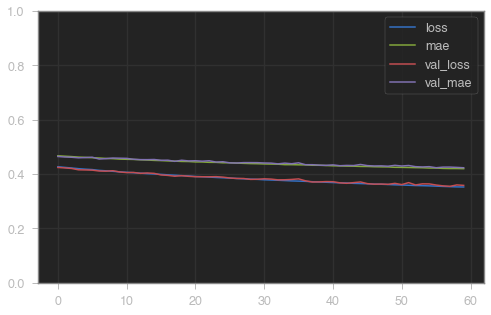

In [9]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()
## So we can see that there's still scope to tune the model and achieve better loss values

In [10]:
## Let's try 60 more epochs
model_history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
362/362 [==============================] - 0s 995us/step - loss: 0.3518 - mae: 0.4187 - val_loss: 0.3602 - val_mae: 0.4250
Epoch 2/60
362/362 [==============================] - 0s 848us/step - loss: 0.3510 - mae: 0.4189 - val_loss: 0.3571 - val_mae: 0.4214
Epoch 3/60
362/362 [==============================] - 0s 935us/step - loss: 0.3501 - mae: 0.4182 - val_loss: 0.3523 - val_mae: 0.4201
Epoch 4/60
362/362 [==============================] - 0s 950us/step - loss: 0.3492 - mae: 0.4173 - val_loss: 0.3504 - val_mae: 0.4185
Epoch 5/60
362/362 [==============================] - 0s 845us/step - loss: 0.3487 - mae: 0.4170 - val_loss: 0.3519 - val_mae: 0.4218
Epoch 6/60
362/362 [==============================] - 0s 1ms/step - loss: 0.3483 - mae: 0.4166 - val_loss: 0.3506 - val_mae: 0.4216
Epoch 7/60
362/362 [==============================] - 0s 871us/step - loss: 0.3468 - mae: 0.4163 - val_loss: 0.3526 - val_mae: 0.4179
Epoch 8/60
362/362 [==============================] - 0s 856us/s

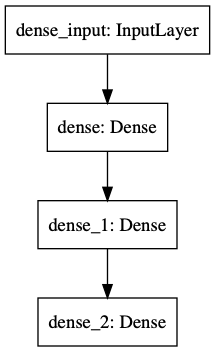

In [11]:
import pydot
tf.keras.utils.plot_model(model)

In [12]:
from ann_visualizer.visualize import ann_viz
ann_viz(model,title="model_neural_network")

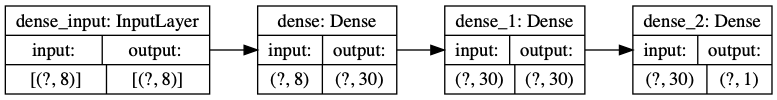

In [13]:
keras.utils.plot_model(model,rankdir='LR',show_shapes=True)

In [14]:
mae_test = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 687us/step - loss: 0.3388 - mae: 0.4039


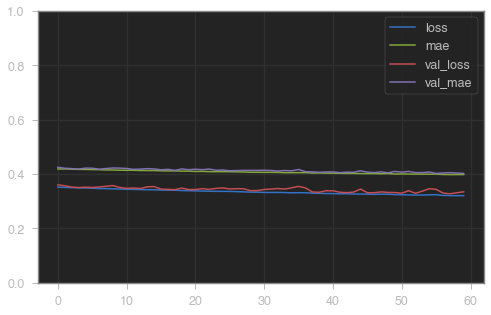

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [17]:
## Let's to predictions
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.62803805]
 [1.5630888 ]
 [4.045289  ]]
[0.477   0.458   5.00001]


In [ ]:
## Notice that our predictions are okay, we can do a lot better
## Let's try few techniques that will unlock little more potential of ANNs

#### MLP ANN

In [2]:
from tensorflow import keras
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout
import datetime
start_time = datetime.datetime.now()

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

## Sequential model lets you add neural net layers one after another by calling function
model_mlp = keras.models.Sequential()

## Adding one layer having only 30 neuron
##mAdding one layer having only 30 neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model_mlp.add(keras.layers.Dense(30, input_shape=(8,), activation='relu'))
model_mlp.add(keras.layers.Dense(30, activation='relu'))
model_mlp.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2()))


In [3]:
## Callbacks
earlystopper = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining the loss function
model_mlp.compile(optimizer=adam, loss='mse', metrics=['mae'])

## Training neural nets
model_mlp_history = model_mlp.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                          epochs=200, batch_size=15, callbacks=[reduce_lr, earlystopper])

end_time = datetime.datetime.now()
print(f'time taken for execution: {end_time-start_time} secs')

Epoch 1/200
771/771 [==============================] - 1s 1ms/step - loss: 0.5476 - mae: 0.4904 - val_loss: 0.3999 - val_mae: 0.4359 - lr: 0.0100
Epoch 2/200
771/771 [==============================] - 1s 876us/step - loss: 0.3920 - mae: 0.4349 - val_loss: 0.3776 - val_mae: 0.4253 - lr: 0.0100
Epoch 3/200
771/771 [==============================] - 1s 880us/step - loss: 0.3593 - mae: 0.4188 - val_loss: 0.3438 - val_mae: 0.3995 - lr: 0.0100
Epoch 4/200
771/771 [==============================] - 1s 882us/step - loss: 0.3379 - mae: 0.4037 - val_loss: 0.3387 - val_mae: 0.3942 - lr: 0.0100
Epoch 5/200
771/771 [==============================] - 1s 885us/step - loss: 0.3284 - mae: 0.3953 - val_loss: 0.3285 - val_mae: 0.4021 - lr: 0.0100
Epoch 6/200
771/771 [==============================] - 1s 891us/step - loss: 0.3233 - mae: 0.3922 - val_loss: 0.3422 - val_mae: 0.4156 - lr: 0.0100
Epoch 7/200
771/771 [==============================] - 1s 898us/step - loss: 0.3144 - mae: 0.3867 - val_loss: 0.32

In [4]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


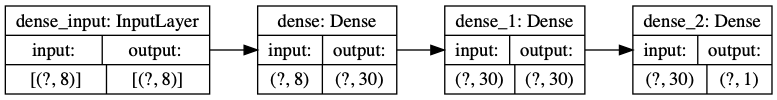

In [5]:
keras.utils.plot_model(model_mlp,rankdir='LR',show_shapes=True)

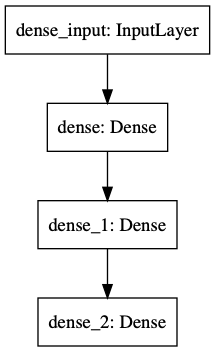

In [6]:
# See the model structure
import pydot
tf.keras.utils.plot_model(model_mlp)

In [7]:
from ann_visualizer.visualize import ann_viz
ann_viz(model_mlp,title="mlp_neural_network")

In [8]:
mae_test = model_mlp.evaluate(X_test, y_test)

129/129 [==============================] - 0s 747us/step - loss: 0.2854 - mae: 0.3603


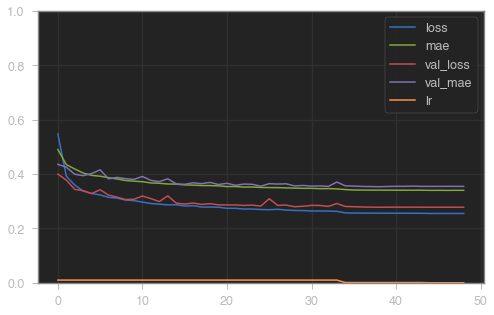

In [9]:
pd.DataFrame(model_mlp_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [10]:
X_new = X_test[:3]
y_pred = model_mlp.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.4836578]
 [1.3748732]
 [4.8087845]]
[0.477   0.458   5.00001]


#### let's try the same with different params

In [2]:
from tensorflow import keras
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout

import datetime

start_time = datetime.datetime.now()

## Defining my optimizer - Its just a refined form of SGD
## ref - https://keras.io/optimizers/
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Just a way to define neural nets. There are two ways sequential and functional
## Sequential model lets you add neural net layers one after another by calling function
model_norm = keras.models.Sequential()

## Adding one layer having only one neuron
## Notice our data has 8 input columns which goes into as the "input_shape" parameter
## Notice the use of l2 regularizer
model_norm.add(Dense(100, input_shape=(8,), activation='relu'))
model_norm.add(Dense(100, activation='relu'))
model_norm.add(Dense(1))


## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
model_norm.compile(optimizer=adam, loss='mse', metrics=['mae'])

## Training neural nets
model_norm_history = model_norm.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                          epochs=200, batch_size=50, callbacks=[reduce_lr, earlystopper])


end_time = datetime.datetime.now()
print(f'time taken for execution: {end_time-start_time} secs')

Epoch 1/200
232/232 [==============================] - 0s 2ms/step - loss: 1.0237 - mae: 0.6627 - val_loss: 0.4644 - val_mae: 0.4898 - lr: 0.0010
Epoch 2/200
232/232 [==============================] - 0s 1ms/step - loss: 0.4049 - mae: 0.4520 - val_loss: 0.3923 - val_mae: 0.4336 - lr: 0.0010
Epoch 3/200
232/232 [==============================] - 0s 1ms/step - loss: 0.3674 - mae: 0.4287 - val_loss: 0.3758 - val_mae: 0.4276 - lr: 0.0010
Epoch 4/200
232/232 [==============================] - 0s 1ms/step - loss: 0.3585 - mae: 0.4180 - val_loss: 0.4174 - val_mae: 0.4154 - lr: 0.0010
Epoch 5/200
232/232 [==============================] - 0s 1ms/step - loss: 0.3538 - mae: 0.4139 - val_loss: 0.3580 - val_mae: 0.4154 - lr: 0.0010
Epoch 6/200
232/232 [==============================] - 0s 1ms/step - loss: 0.3356 - mae: 0.4053 - val_loss: 0.3637 - val_mae: 0.4138 - lr: 0.0010
Epoch 7/200
232/232 [==============================] - 0s 1ms/step - loss: 0.3264 - mae: 0.4005 - val_loss: 0.5162 - val_mae

Epoch 54/200
232/232 [==============================] - 0s 1ms/step - loss: 0.2720 - mae: 0.3585 - val_loss: 0.2960 - val_mae: 0.3726 - lr: 1.0000e-06
Epoch 55/200
232/232 [==============================] - 0s 1ms/step - loss: 0.2720 - mae: 0.3585 - val_loss: 0.2960 - val_mae: 0.3726 - lr: 1.0000e-06
Epoch 56/200
232/232 [==============================] - 0s 996us/step - loss: 0.2720 - mae: 0.3585 - val_loss: 0.2960 - val_mae: 0.3726 - lr: 1.0000e-06
Epoch 57/200
232/232 [==============================] - 0s 1ms/step - loss: 0.2720 - mae: 0.3585 - val_loss: 0.2959 - val_mae: 0.3726 - lr: 1.0000e-06
Epoch 58/200
198/232 [========================>.....] - ETA: 0s - loss: 0.2725 - mae: 0.3598
Epoch 00058: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
232/232 [==============================] - 0s 1ms/step - loss: 0.2720 - mae: 0.3585 - val_loss: 0.2959 - val_mae: 0.3725 - lr: 1.0000e-06
Epoch 59/200
232/232 [==============================] - 0s 1ms/step - loss: 0.2719

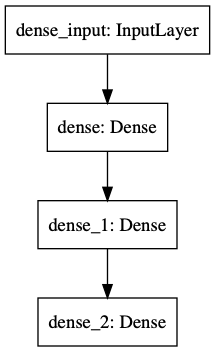

In [3]:
# See the model structure
import pydot
keras.utils.plot_model(model_norm)

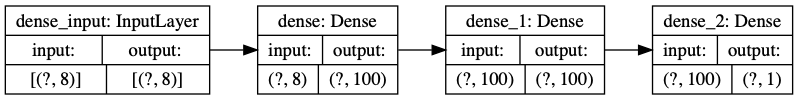

In [4]:
keras.utils.plot_model(model_norm,rankdir='LR',show_shapes=True)

In [5]:
mae_test = model_norm.evaluate(X_test, y_test)

129/129 [==============================] - 0s 641us/step - loss: 0.3001 - mae: 0.3724


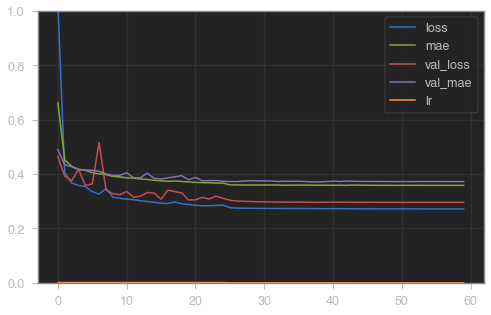

In [6]:
pd.DataFrame(model_norm_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [7]:
X_new = X_test[:3]
y_pred = model_norm.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5385986]
 [1.4178267]
 [4.6811843]]
[0.477   0.458   5.00001]
